# Teen Phone Addiction Predictor Model

Mobile phones have become an inseparable part of modern life, especially among teenagers. While these devices offer access to education, communication, and entertainment, excessive use can lead to negative consequences such as reduced academic performance, disturbed sleep, mental health issues, and increased screen dependency.

This notebook focuses on analyzing a dataset related to **teen phone usage behaviors** and their impact on **phone addiction levels**. The goal is to:
- Understand how various factors like screen time, app usage, and daily habits influence addiction.
- Perform Exploratory Data Analysis (EDA) to uncover key patterns and correlations..



In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# dataset
df = pd.read_csv("/kaggle/input/teen-phone-addiction-and-lifestyle-survey/teen_phone_addiction_dataset.csv")

df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [5]:
# descibing the numerical Features
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


##  EDA & Data Preprocessing

In [6]:
def n_uniques(data , cols):
    for col in cols:
        print(f"Unique values in {col} : {df[col].nunique()}")

cols = ["ID" , "Name" , "Location"]
n_uniques(df.copy() , cols)

Unique values in ID : 3000
Unique values in Name : 2933
Unique values in Location : 2726


In [7]:
# Dropping the non required features
# ID , Name , Location
df = df.drop((cols) , axis = 1)
df.head()

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,Female,9th,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,17,Female,7th,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,13,Other,11th,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,18,Female,12th,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,14,Other,9th,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


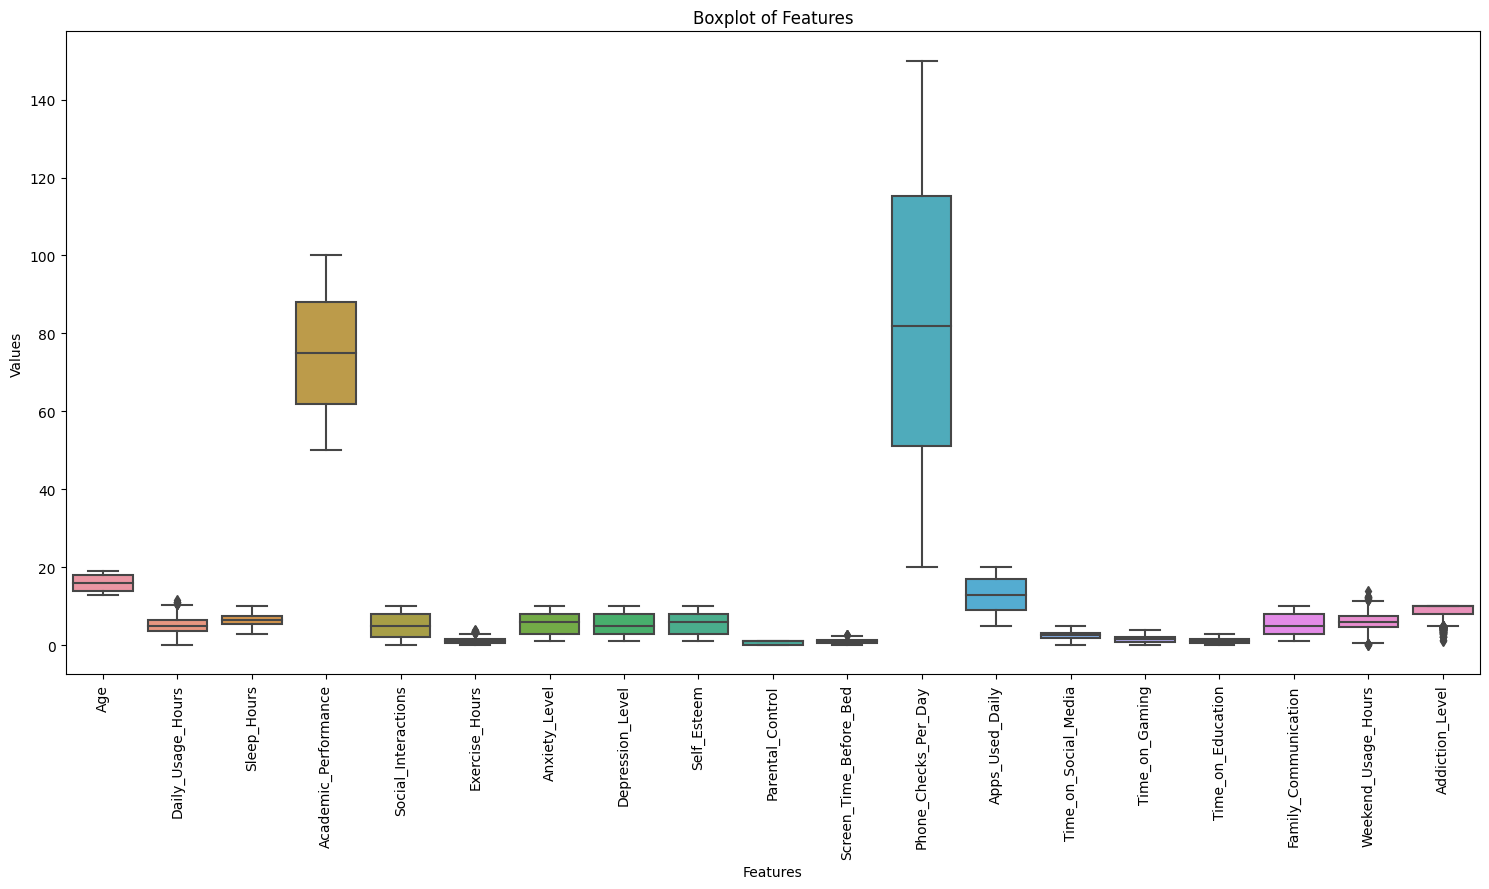

In [8]:
# Outliers in Numerical Columns

df_numericals = df.drop(columns = ["Gender" , "School_Grade" ,"Phone_Usage_Purpose"])
    
plt.figure(figsize = (15 ,9))
sns.boxplot(data = df_numericals)
plt.title("Boxplot of Features")
plt.xticks(rotation= 90)
plt.xlabel("Features")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [9]:
# string values & counts (in specific columns)
def n_counts(data , cols):
    for col in cols:
        print(f" {col} : {data[col].value_counts()}")
        print()

cols = ["Gender" , "School_Grade" ,"Phone_Usage_Purpose"]
n_counts(df.copy() , cols)

 Gender : Gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64

 School_Grade : School_Grade
12th    529
9th     526
7th     497
10th    487
8th     482
11th    479
Name: count, dtype: int64

 Phone_Usage_Purpose : Phone_Usage_Purpose
Browsing        627
Other           622
Education       602
Social Media    575
Gaming          574
Name: count, dtype: int64



In [10]:
# Numeric columns
# taking out columns except target variable (Addiction_Level)
columns = list(df.columns)
for col in ["Addiction_Level" , "Gender" , "School_Grade" ,"Phone_Usage_Purpose"]:
    columns.remove(col)


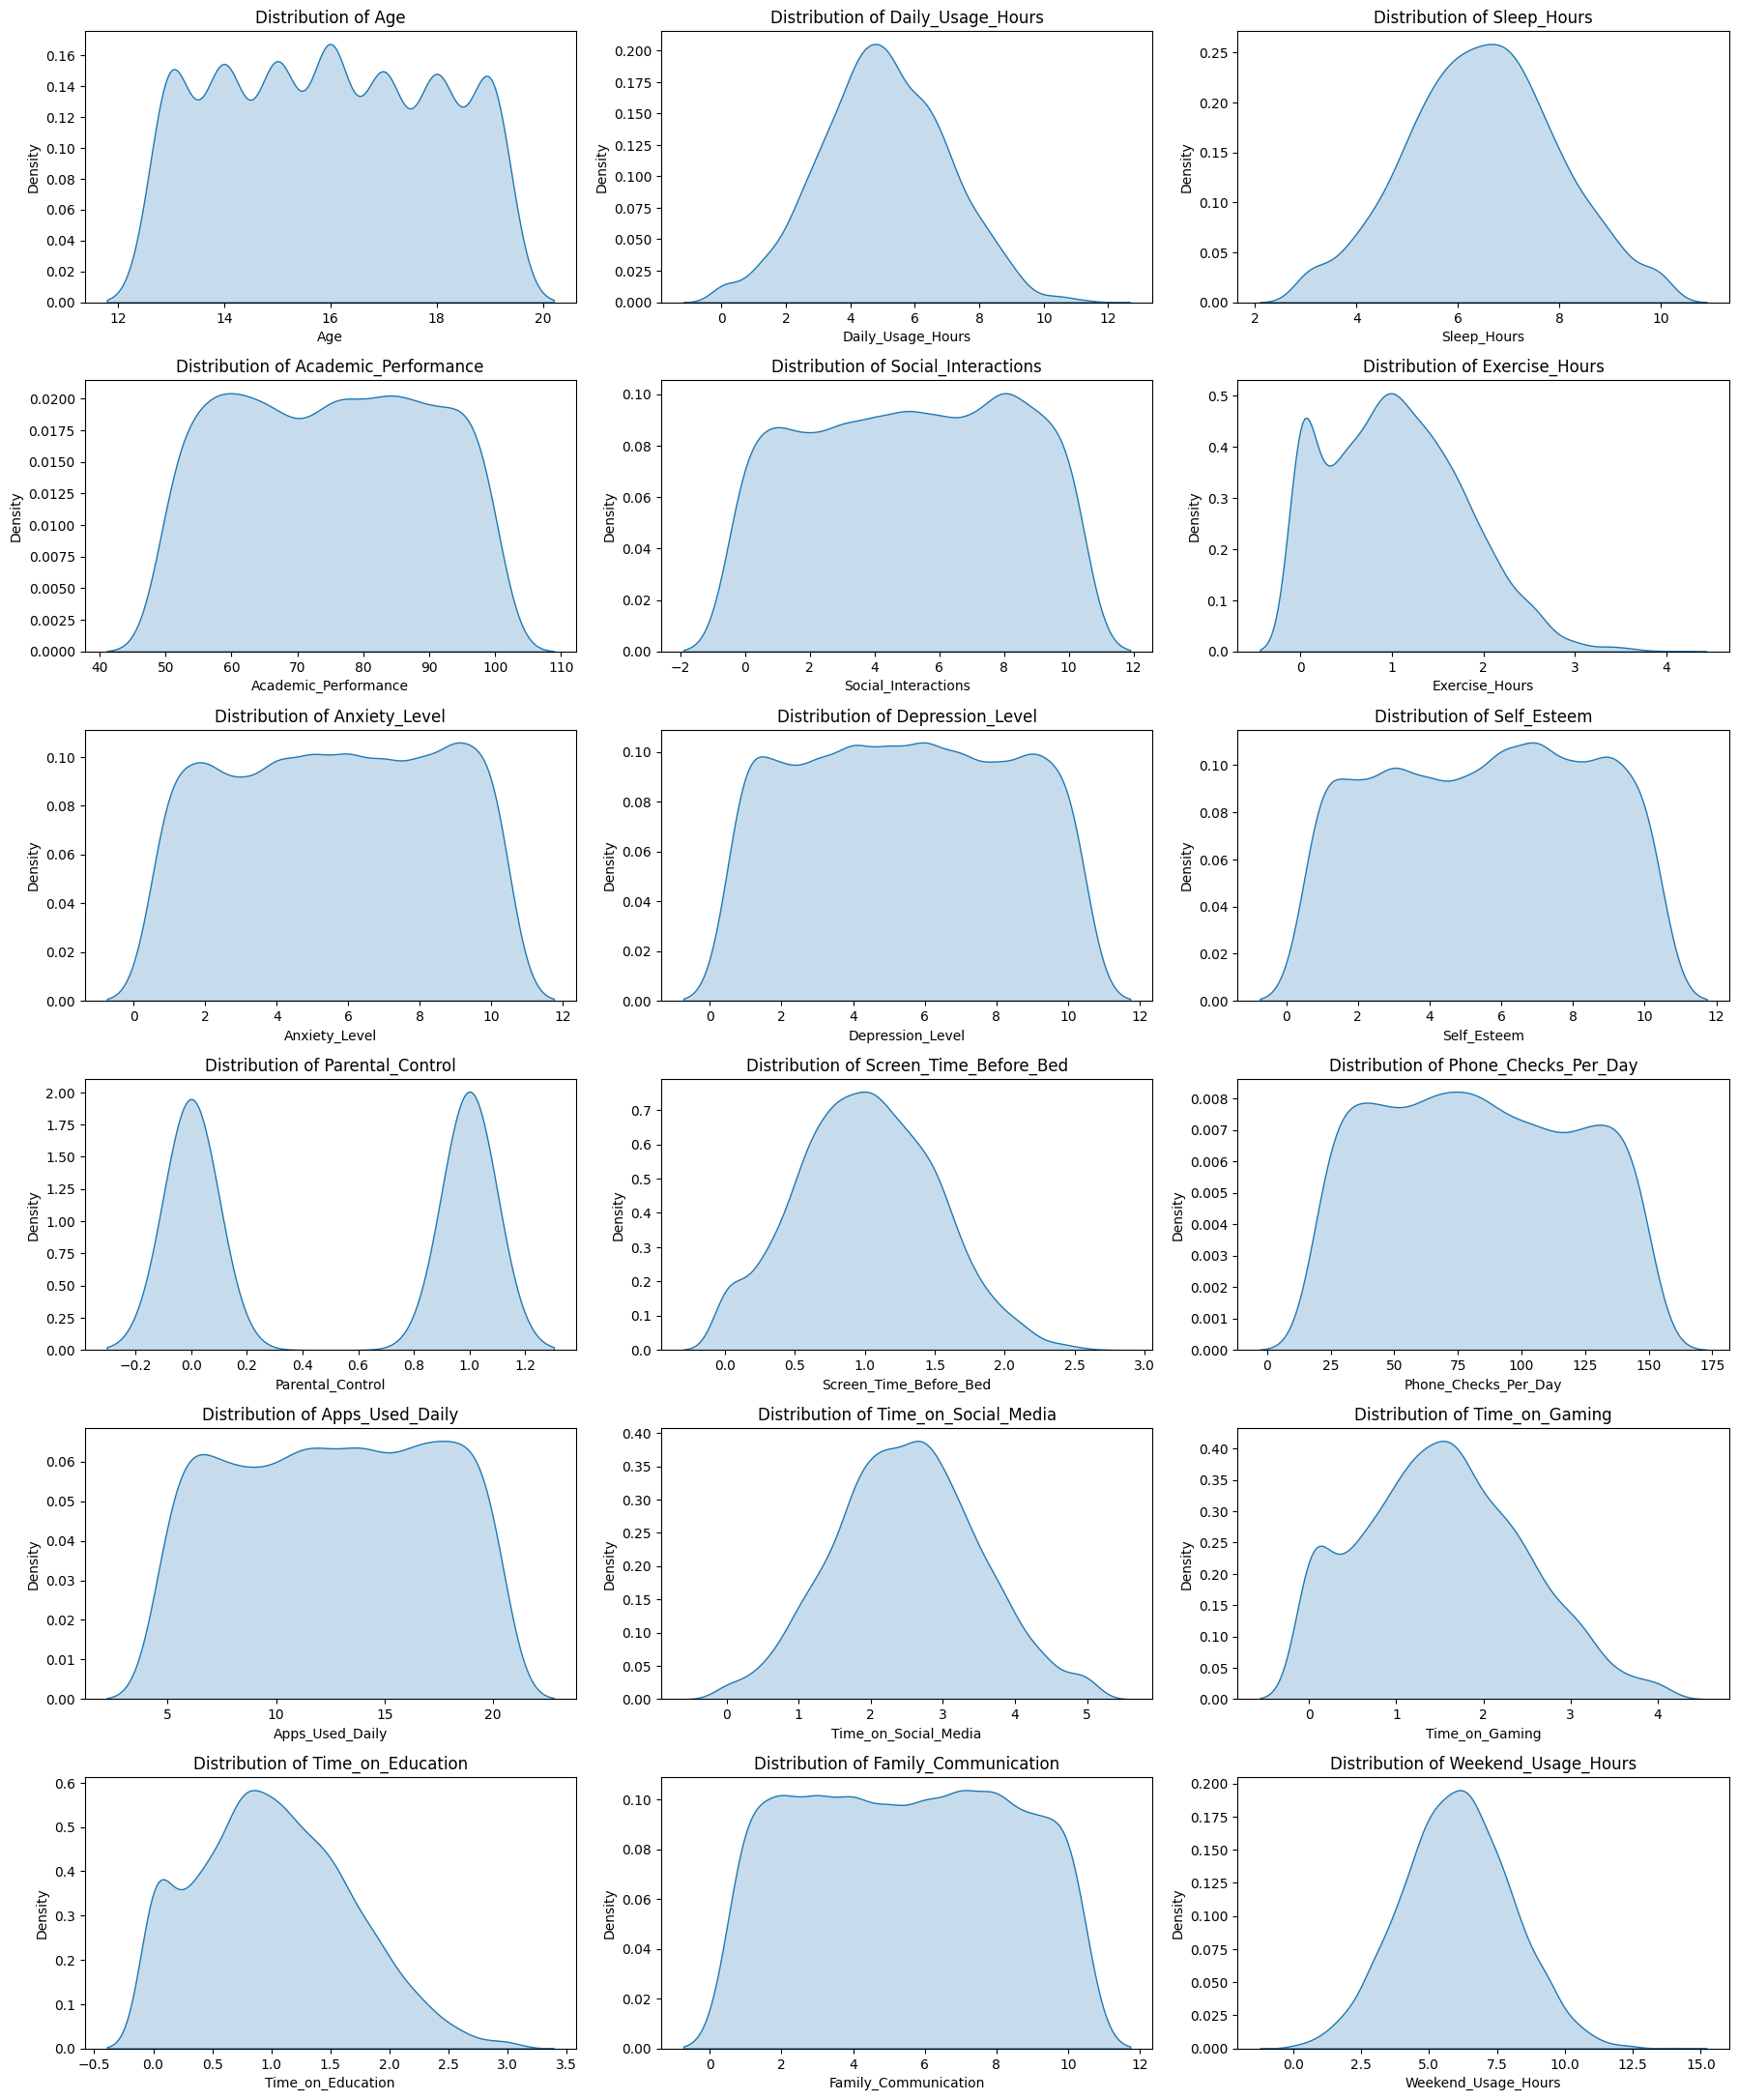

In [11]:
# Distribution of all numerical columns
plt.figure(figsize = (18,25))
for i , col in enumerate(columns , 1):
    plt.subplot(7,3,i)
    sns.kdeplot(x = col ,data = df ,shade = True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [12]:
# mapping string values to numerical
# "Gender" , "School_Grade" ,"Phone_Usage_Purpose"

# Gender
df["Gender"] = df["Gender"].map({
    "Male":0,
    "Female":1,
    "Other":2
})

# School_Grade
df["School_Grade"] = df["School_Grade"].map({
    "7th":0,
    "8th":1,
    "9th":2,
    "10th":3,
    "11th":4,
    "12th":5
})

# Phone_Usage_Purpose
df["Phone_Usage_Purpose"] = df["Phone_Usage_Purpose"].map({
    "Education":0,
    "Browsing":1,
    "Social Media":2,
    "Gaming":3,
    "Other":4
})

df.head()

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,1,2,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,1,4,8.7,10.0
1,17,1,0,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,1,2,5.3,10.0
2,13,2,4,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,0,6,5.7,9.2
3,18,1,5,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,2,8,3.0,9.8
4,14,2,2,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,3,10,3.7,8.6


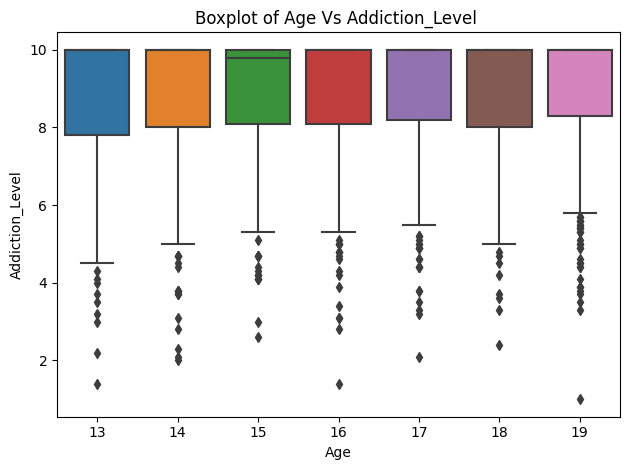

In [13]:
# Age Vs Addiction_Level boxplot
# statistical chart
sns.boxplot(x = df["Age"],y = df["Addiction_Level"] )
plt.title("Boxplot of Age Vs Addiction_Level ")
plt.xlabel("Age")
plt.ylabel("Addiction_Level")
plt.tight_layout()
plt.show()

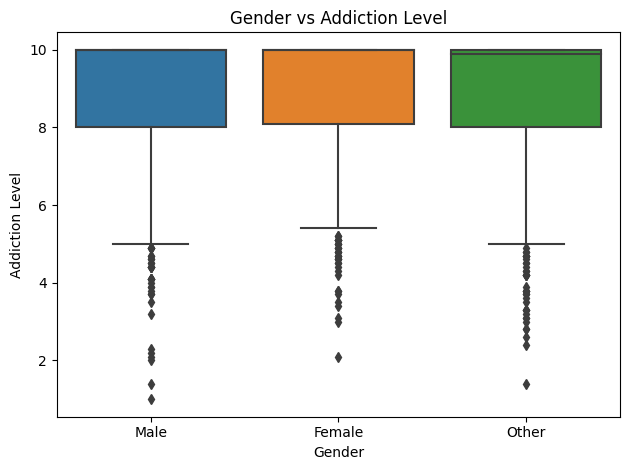

In [14]:
# Gender Vs Addiction Level

sns.boxplot(x='Gender', y='Addiction_Level', data=df)
plt.title("Gender vs Addiction Level")
plt.xticks([0,1,2] , ["Male" , "Female" , "Other"])
plt.xlabel("Gender")
plt.ylabel("Addiction Level")
plt.tight_layout()
plt.show()

In [15]:
# checking for social_Inetractions ,Family_Communication
df["Social_Interactions"].value_counts() , df["Family_Communication"].value_counts()

(Social_Interactions
 8     318
 5     284
 9     276
 6     275
 4     272
 3     268
 1     268
 10    267
 7     267
 0     257
 2     248
 Name: count, dtype: int64,
 Family_Communication
 8     313
 7     312
 4     305
 2     305
 1     305
 3     304
 6     298
 10    294
 5     290
 9     274
 Name: count, dtype: int64)

In [16]:
# concludes that alot of 0 values in Social_Interactions
# confirming it with features like 	Family_Communication, Exercise_Hours,Anxiety_Level,Depression_Level
df[df["Social_Interactions"] == 0]

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
8,13,0,1,3.0,9.1,79,0,1.8,1,7,...,0.9,70,13,2.7,2.2,1.3,0,10,9.1,7.3
29,19,2,4,8.6,5.2,63,0,1.1,6,4,...,1.3,72,15,0.2,1.8,0.7,1,9,6.6,10.0
38,16,2,2,7.4,6.9,67,0,1.7,6,6,...,1.6,117,16,1.6,0.7,0.7,2,8,4.6,10.0
78,13,2,1,5.2,6.0,87,0,0.8,1,5,...,1.6,79,11,4.2,0.0,1.2,3,6,3.7,10.0
88,14,0,4,3.0,6.6,82,0,0.8,1,3,...,0.6,84,6,3.7,2.3,1.0,4,9,6.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,13,1,3,9.3,4.8,73,0,0.0,1,1,...,1.5,114,8,2.6,2.0,1.5,1,1,6.3,10.0
2967,17,2,0,3.7,8.3,57,0,2.8,10,2,...,1.3,26,13,3.2,0.1,0.6,2,7,5.0,6.0
2971,14,0,4,3.5,5.6,58,0,1.7,5,7,...,1.2,109,8,1.7,1.7,1.0,4,8,7.0,7.9
2974,18,1,2,5.0,7.4,60,0,1.0,10,1,...,0.5,70,15,4.5,1.0,1.0,0,5,3.8,10.0


**Concluding that Social Inetraction with value 0 is not wrong**

In [17]:
# Academics and Education 
# (0 - Education) in Phone_Usage_Purpose 
mask = (df["Time_on_Education"] == 0 ) & (df["Phone_Usage_Purpose"] == 0) 
df[[ "Academic_Performance",  "Time_on_Gaming", "Time_on_Social_Media" , "Time_on_Education" ,"Phone_Usage_Purpose" ]][mask] 

,Academic_Performance,Time_on_Gaming,Time_on_Social_Media,Time_on_Education,Phone_Usage_Purpose
39,68,0.6,2.4,0.0,0
52,79,1.5,3.1,0.0,0
61,77,1.3,0.7,0.0,0
104,71,0.0,0.1,0.0,0
112,51,3.3,1.7,0.0,0
127,57,3.7,0.5,0.0,0
135,75,1.6,3.0,0.0,0
174,52,1.3,2.3,0.0,0
312,80,2.2,2.9,0.0,0
327,53,0.0,2.3,0.0,0


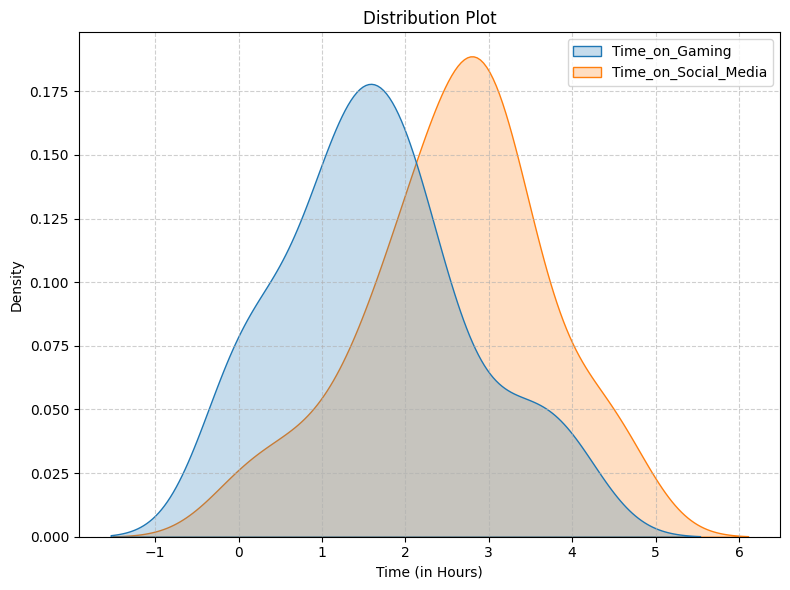

In [18]:
# visualizing that regarding the social media and gaming
plt.figure(figsize = (8 , 6 ))
sns.kdeplot(data = df[['Time_on_Gaming', 'Time_on_Social_Media']][mask] , shade = True)
plt.title("Distribution Plot")
plt.ylabel("Density")
plt.xlabel("Time (in Hours)")
plt.grid(True , linestyle = "--" , alpha = 0.6)
plt.tight_layout()
plt.show()

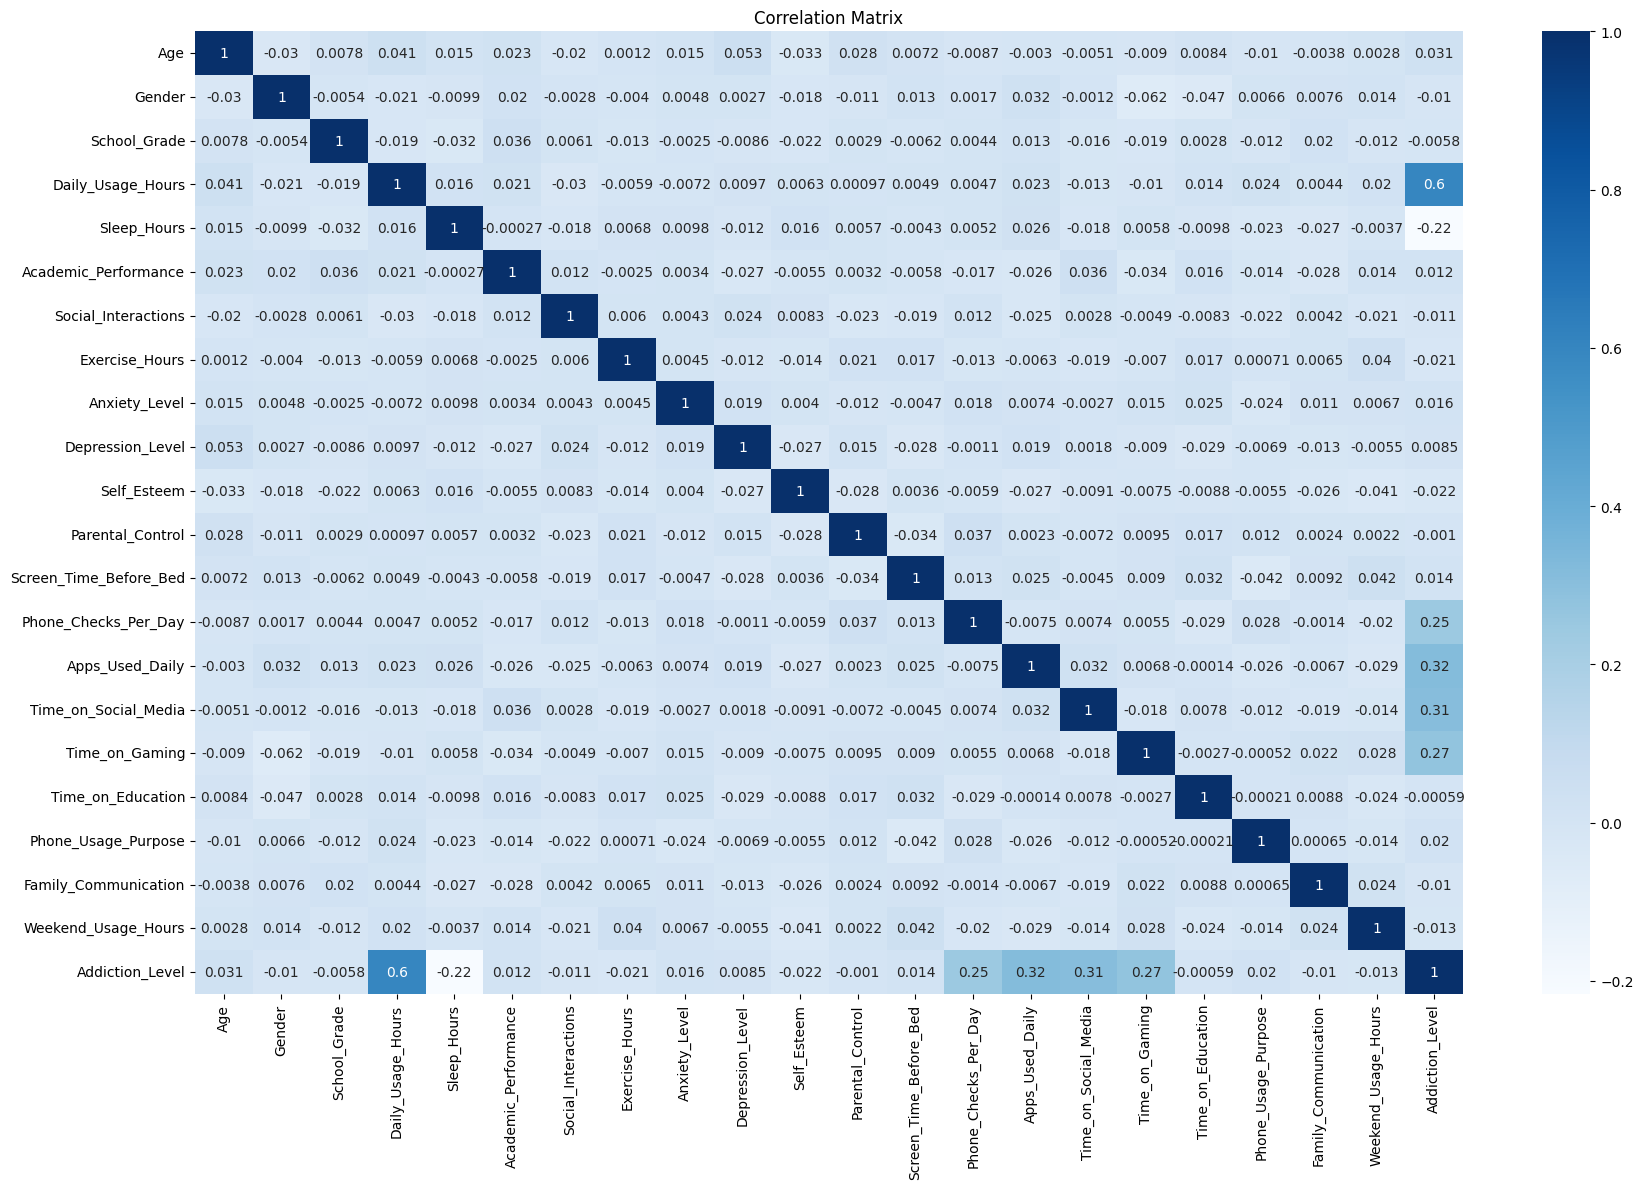

In [19]:
plt.figure(figsize = (18 , 12))
sns.heatmap(df.corr() , annot = True , cmap ="Blues")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()